# Exploratory Data Analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import numpy as np

## Load data

In [2]:
dataset_path ='/data/md311/Breast_Cancer_Detection_DBT/dataset/' 
df = pd.read_csv(dataset_path+'data_csv/train-v2_table_list_slice.csv')
df

,StudyUID,view,img_path,Normal,Actionable,Benign,Cancer
0,DBT-S00163,rmlo,./images/train-v2/DBT-S00163_rmlo_16.png,0,0,1,0
1,DBT-S04378,lcc,./images/train-v2/DBT-S04378_lcc_31.png,0,1,0,0
2,DBT-S04378,lmlo,./images/train-v2/DBT-S04378_lmlo_33.png,0,1,0,0
3,DBT-S04378,rcc,./images/train-v2/DBT-S04378_rcc_29.png,0,1,0,0
4,DBT-S04378,rmlo,./images/train-v2/DBT-S04378_rmlo_31.png,0,1,0,0
...,...,...,...,...,...,...,...
16892,DBT-S02297,lcc,./images/train-v2/DBT-S02297_lcc_16.png,1,0,0,0
16893,DBT-S02297,lmlo,./images/train-v2/DBT-S02297_lmlo_16.png,1,0,0,0
16894,DBT-S02297,rcc,./images/train-v2/DBT-S02297_rcc_16.png,1,0,0,0
16895,DBT-S02297,rmlo,./images/train-v2/DBT-S02297_rmlo_16.png,1,0,0,0


In [28]:
# Checking for missing data
df.isnull().sum()

StudyUID      0
view          0
img_path      0
Normal        0
Actionable    0
Benign        0
Cancer        0
dtype: int64

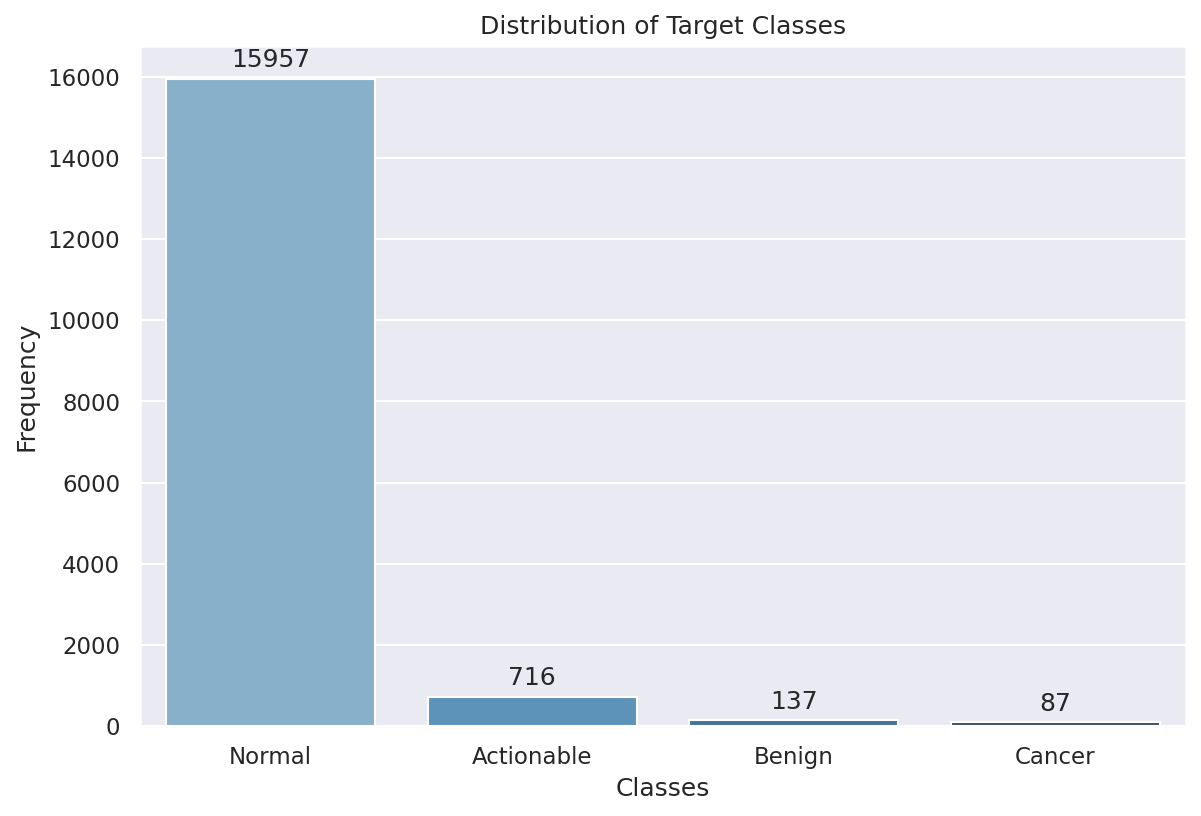

In [27]:
# Checking the distribution of the target classes
class_counts = df[['Normal', 'Actionable', 'Benign', 'Cancer']].sum()
plt.figure(figsize=(9,6),dpi=150)
sns.set_theme(style="darkgrid")
sns_barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")

for p in sns_barplot.patches:
    sns_barplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title("Distribution of Target Classes")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

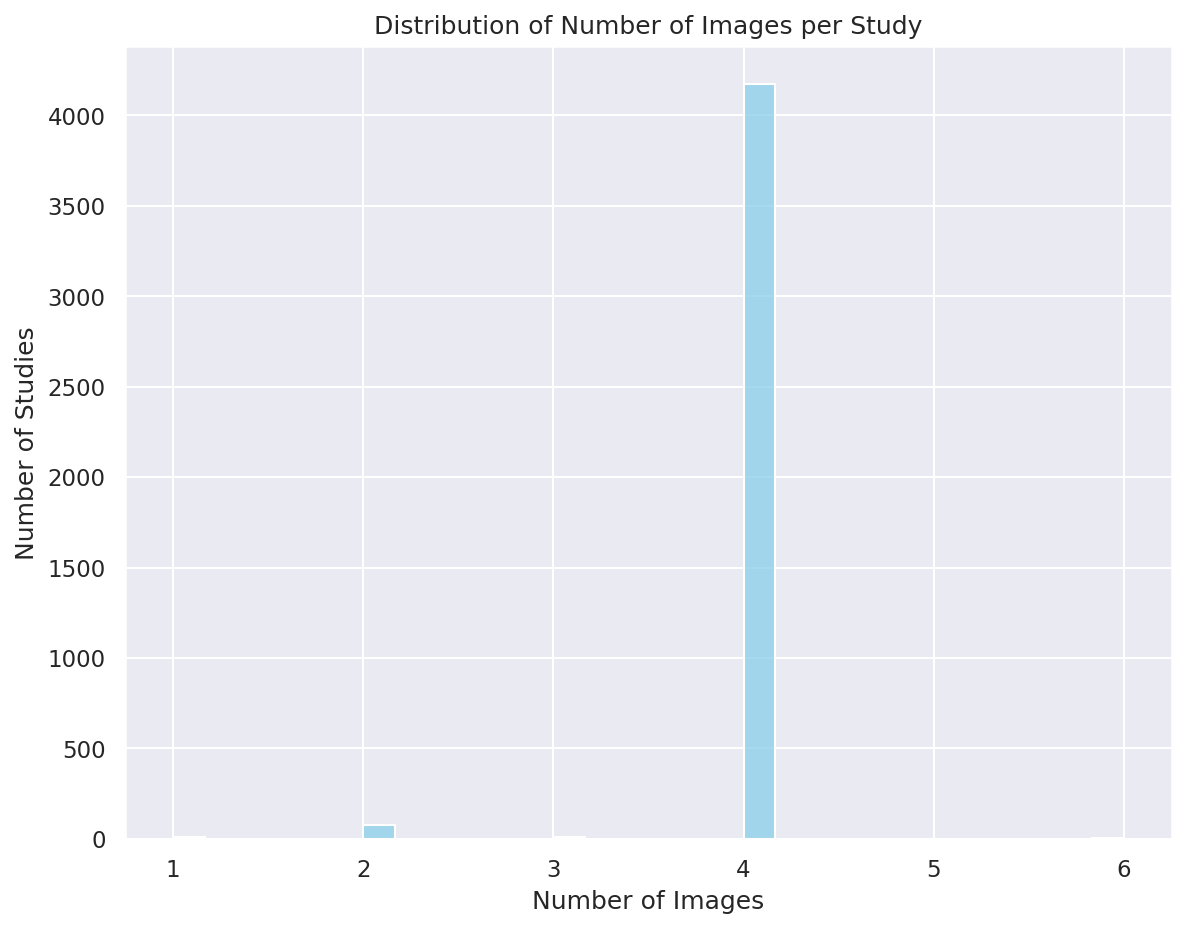

In [24]:
# Number of images per study
images_per_study = df['StudyUID'].value_counts()

# Plotting the histogram
plt.figure(figsize=(9,7),dpi=150)
sns.histplot(images_per_study, bins=30, kde=False, color='skyblue')

plt.title('Distribution of Number of Images per Study')
plt.xlabel('Number of Images')
plt.ylabel('Number of Studies')
plt.show()

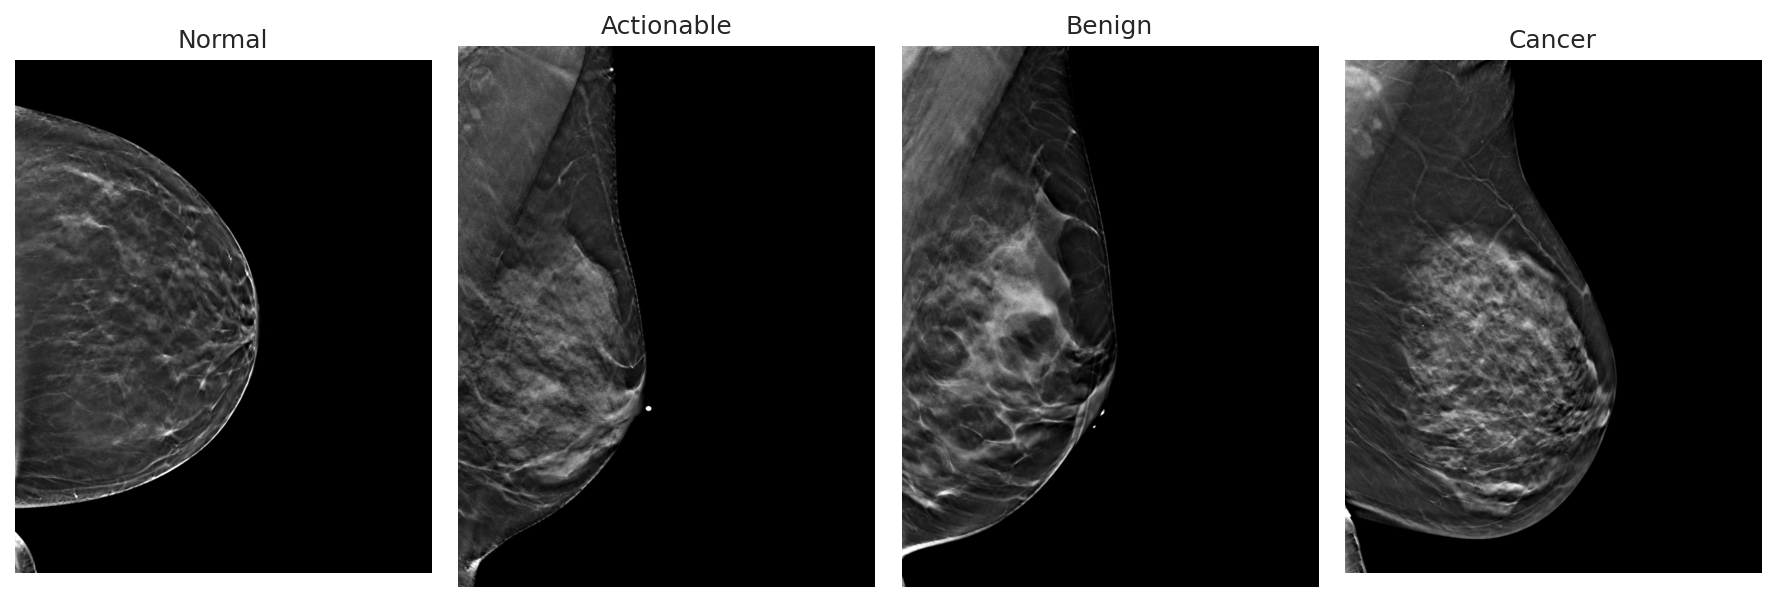

In [25]:
classes = ['Normal', 'Actionable', 'Benign', 'Cancer']

# Create a 2x2 subplot
fig, axes = plt.subplots(1, 4, figsize=(12, 12), dpi=150)
axes = axes.ravel()

# For each class
for i, cls in enumerate(classes):
    # Filter the dataframe for the class
    df_class = df[df[cls] == 1]
    
    # Randomly select an image from the class
    random_image = df_class.sample(1)['img_path'].values[0]
    
    # Read the image
    img = Image.open(os.path.join('/data/md311/Breast_Cancer_Detection_DBT/dataset/', random_image))
    
    # Plot the image
    axes[i].imshow(np.array(img), cmap='gray')
    axes[i].set_title(cls)
    axes[i].axis('off')

plt.tight_layout()
plt.show()